# Übung 3 - Datenvorbereitung, Modelltraining und -bewertung

Notwendige Bibliotheken werden geladen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lesen Sie erneut die Kundendaten ein und geben Sie die ersten Zeilen aus.

In [2]:
df = pd.read_csv('01_Kundendaten.csv')
df.head()

,customerID,gender,age_first_order,user_agent_brand,user_agent_os,ip_address_geopoint,ip_address_city,ip_address_region,ip_address_country_code,campaign,pages_visited_avg,total_sum,count
0,000759,M,19.0,Chrome,MacOS X,POINT(126.9741 37.5112),NaN,NaN,KR,True,13.666667,146.0,3
1,000759,M,NaN,Firefox,Linux,POINT(-97.822 37.751),NaN,NaN,US,False,13.666667,146.0,3
2,001571,M,38.0,Chrome,MacOS X,POINT(121.5318 25.0478),Taipei,Taipei City,TW,False,13.333333,66.0,3
3,002453,F,42.0,Chrome,MacOS X,POINT(139.69 35.69),NaN,NaN,JP,True,12.333333,93.0,3
4,004074,M,NaN,Chrome,Windows,POINT(-71.5213 42.9403),Bedford,New Hampshire,US,True,9.000000,23.0,1


## 3.1 Business Understanding: Was ist Ihre Zielvariable?

Ziel ist es ein Modell zu entwickeln, welches für das Unternehmen die umsatzstärksten Kunden findet. Es wird festgelegt, dass ein Kunde als umsatzstark gilt, wenn der Gesamtumsatz über 300 liegt.

Dafür soll ein neues Attribut "high revenue" über den Gesamtumsatz eines Kundens "total_sum" berechnet werden. Ist der Schwellwert von 300 überschritten, so ist "high revenue" mit "1" gekennzeichnet, sonst "0". Hierfür können Sie die numpy Funktion np.where(Bedingung,wenn Wahr, wenn falsch) verwenden.

Fügen Sie die Spalte "high revenue" dem Datensatz hinzu und überprüfen Sie das Ergebnis.

In [3]:
df['high revenue'] = np.where(df['total_sum'] > 300, 1, 0)
df[['total_sum','count', 'high revenue']].head(10)

,total_sum,count,high revenue
0,146.0,3,0
1,146.0,3,0
2,66.0,3,0
3,93.0,3,0
4,23.0,1,0
5,17.5,1,0
6,23.0,1,0
7,1179.0,3,1
8,62.0,2,0
9,184.0,4,0


## 3.2 Verteilung der Zielvariable

Zunächst wollen wir einmal wissen, wie "high revenue" in den Daten verteilt ist.

Dazu werden die Ausprägungen von "high revenue" gezählt über die groupby Funktion und als Balkendiagramm dargestellt. 

<AxesSubplot:xlabel='high revenue'>

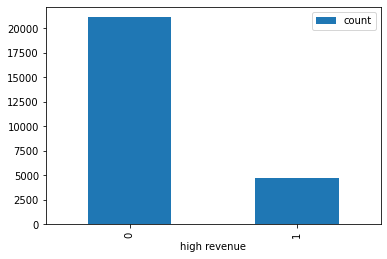

In [4]:
bc = df.groupby('high revenue').agg({'count':'sum'})

bc.plot.bar()

## 3.3 Datenreduktion & -bereinigung

Bezüglich des Data Understanding wurde der Fachbereich befragt und dort wurde festgelegt, dass nicht alle vorhandenen Attribute relevant sind. Es sollen im Datensatz nur noch folgende verwendet werden:

- gender
- age_first_order
- user_agent_brand, user_agent_os
- campaign
- pages_visited_average
- high revenue

In [5]:
dfFilter = df[['gender','age_first_order','user_agent_brand',
         'user_agent_os', 'campaign', 'pages_visited_avg','high revenue']]

dfFilter.head(10)

,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,high revenue
0,M,19.0,Chrome,MacOS X,True,13.666667,0
1,M,NaN,Firefox,Linux,False,13.666667,0
2,M,38.0,Chrome,MacOS X,False,13.333333,0
3,F,42.0,Chrome,MacOS X,True,12.333333,0
4,M,NaN,Chrome,Windows,True,9.000000,0
5,NaN,72.0,Chrome,Windows,False,12.000000,0
6,F,35.0,Chrome,MacOS X,False,13.000000,0
7,F,67.0,Firefox,Windows,False,8.666667,1
8,F,63.0,Chrome,Windows,False,14.500000,0
9,F,44.0,Chrome,Windows,False,14.250000,0


Nun folgt die Datensäuberung. Lassen Sie sich fehlende Werte anzeigen und führen Sie folgende Schritte der Datensäuberung durch:

1. Fehlende Werte (NaN) mit häufigsten Wert ersetzen

In [6]:
dfFilter.isnull().sum()

gender               1100
age_first_order       891
user_agent_brand        0
user_agent_os           0
campaign                0
pages_visited_avg       0
high revenue            0
dtype: int64

In [7]:
dfClean = dfFilter.copy()

# 1
dfClean['gender'] = dfClean['gender'].fillna(dfClean['gender'].mode()[0])
dfClean['age_first_order'] = dfClean['age_first_order'].fillna(dfClean['age_first_order'].mode()[0])
#dfClean = dfClean.fillna(dfClean.mode())
dfClean.head(20)


,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,high revenue
0,M,19.0,Chrome,MacOS X,True,13.666667,0
1,M,65.0,Firefox,Linux,False,13.666667,0
2,M,38.0,Chrome,MacOS X,False,13.333333,0
3,F,42.0,Chrome,MacOS X,True,12.333333,0
4,M,65.0,Chrome,Windows,True,9.000000,0
5,M,72.0,Chrome,Windows,False,12.000000,0
6,F,35.0,Chrome,MacOS X,False,13.000000,0
7,F,67.0,Firefox,Windows,False,8.666667,1
8,F,63.0,Chrome,Windows,False,14.500000,0
9,F,44.0,Chrome,Windows,False,14.250000,0


In der Datentransformation wollen wir eine Kodierung in numerische Werte vornehmen (auch wenn wir hier nicht ordinale Attribute haben). Dazu nutzen wir den LabelEncoder(). Wenden Sie den ebenfalls für user_agent_os und user_agent_brand an und schauen Sie sich an, wie sinnvoll Sie das Ergebnis finden.

In [8]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

dfPrepared = dfClean.copy()

labelenc.fit(dfPrepared.gender)
dfPrepared['gender'] = labelenc.transform(dfPrepared.gender)

labelenc.fit(dfClean.user_agent_os)
dfPrepared['user_agent_os'] = labelenc.transform(dfPrepared.user_agent_os)

labelenc.fit(dfClean.user_agent_brand)
dfPrepared['user_agent_brand'] = labelenc.transform(dfPrepared.user_agent_brand)

dfPrepared["campaign"] = dfPrepared["campaign"].astype(int)


dfPrepared.head(10)

,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,high revenue
0,1,19.0,0,1,1,13.666667,0
1,1,65.0,2,0,0,13.666667,0
2,1,38.0,0,1,0,13.333333,0
3,0,42.0,0,1,1,12.333333,0
4,1,65.0,0,2,1,9.000000,0
5,1,72.0,0,2,0,12.000000,0
6,0,35.0,0,1,0,13.000000,0
7,0,67.0,2,2,0,8.666667,1
8,0,63.0,0,2,0,14.500000,0
9,0,44.0,0,2,0,14.250000,0


## 4.4 Teilung in Trainings- & Testdaten
Das Zielattribut wird von dem Datenframe seperiert. Trainings- und Testdaten sind im Verhältnis 70:30 aufgeteilt. Über die Option "stratify" ist die Verteilung des Zielattributes identisch zu der in den Ausgangsdaten.

In [9]:
from sklearn.model_selection import train_test_split

x = dfPrepared.drop(['high revenue'], axis = 1)
y = dfPrepared['high revenue']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.3)

## 4.5 Entscheidungsbaum-Modell
So wird bspw. ein Entscheidungsbaum (engl. decision tree) mit dem gesplitteten Datenset trainiert und anschließend auf den Testdaten evaluiert. 

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 10)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)


## 4.6 Bewertung des Modells
Anschließend folgt die Bewertung des Modells auf den Testdaten.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2939
           1       0.25      0.23      0.24       298

    accuracy                           0.86      3237
   macro avg       0.59      0.58      0.58      3237
weighted avg       0.86      0.86      0.86      3237



Die absolute Verteilung ist in Form einer Confusion Matrix dargestellt.

In [12]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[2730  209]
 [ 229   69]]


Wie bewerten Sie die Güte des Modells?

## 4.7 k-fold Cross-Validation
Schritt 5 wird mit einer k-fold Cross Validation mit k = 10 wiederholt. Zuvor bezog sich der Score nur auf einen Testdatensatz. Durch Cross-Validation werden 10 Scores durch 10 Iterationen erzeugt. Anschließend ist der Mittelwert der Scores ausgegeben.

In [13]:
# TODO: Was ist jetzt die neue Erkenntnis?

from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = dt_model, X = x, y = y, cv = 10, n_jobs = 4,
                        return_estimator = True, return_train_score = True)

dfScores = pd.DataFrame.from_dict(scores)
dfScores['test_score'].mean()

0.8626131183790393

Vergleichen Sie nun den Score der Kreuzvalidierung mit dem obigen. Was sagt Ihnen der Unterschied? Lassen Sie sich die einzelnen Scores anzeigen.

In [14]:
dfScores

,fit_time,score_time,estimator,test_score,train_score
0,0.024240,0.003930,DecisionTreeClassifier(random_state=10),0.850788,0.982283
1,0.031460,0.005214,DecisionTreeClassifier(random_state=10),0.854495,0.982386
2,0.034855,0.004544,DecisionTreeClassifier(random_state=10),0.884152,0.983004
3,0.026604,0.004005,DecisionTreeClassifier(random_state=10),0.860056,0.983416
4,0.031841,0.003808,DecisionTreeClassifier(random_state=10),0.871177,0.983313
5,0.022970,0.003983,DecisionTreeClassifier(random_state=10),0.850788,0.983107
6,0.028144,0.003754,DecisionTreeClassifier(random_state=10),0.859129,0.983004
7,0.030563,0.005060,DecisionTreeClassifier(random_state=10),0.855288,0.983932
8,0.034287,0.004271,DecisionTreeClassifier(random_state=10),0.863636,0.983005
9,0.026312,0.003575,DecisionTreeClassifier(random_state=10),0.876623,0.983211


### Warum sollten Sie die Leave-one-out Variante ggf. nicht testen?
Sie ist rechenintensiv.